## **FLOWER RECOGNITION**

### Importing necessary libraries

In [6]:
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense, Dropout,MaxPooling2D
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Activation
import pandas as pd
import keras.backend as K
import numpy as np
from IPython.display import Image, display
#from keras_tuner import RandomSearch
#from keras_tuner.engine.hyperparameters import HyperParameters
from tqdm import tqdm
#import cv2
import random as rn
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

**displaying flower images from each class**

daisy


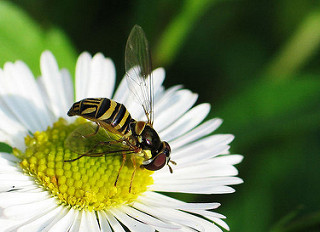



dandelion


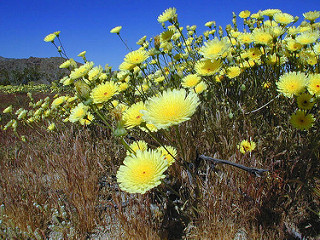



rose


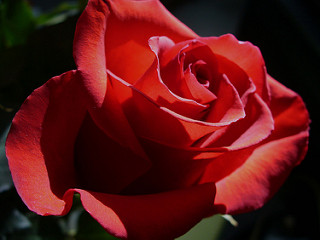



sunflower


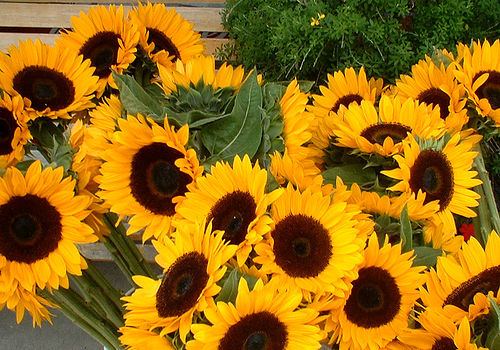



tulip


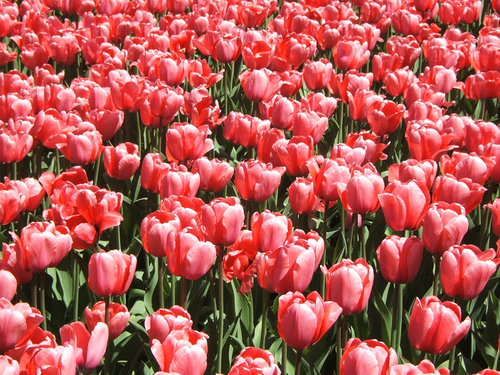

In [7]:
listOfImageNames = ['B:\\Harsha\\Praxis\\Term3\\DL\\flowers5\\flowers5\\daisy\\5547758_eea9edfd54_n.jpg',
                    'B:\\Harsha\\Praxis\\Term3\\DL\\flowers5\\flowers5\\dandelion\\8223949_2928d3f6f6_n.jpg',
                    'B:\\Harsha\\Praxis\\Term3\\DL\\flowers5\\flowers5\\rose\\394990940_7af082cf8d_n.jpg',
                    'B:\\Harsha\\Praxis\\Term3\\DL\\flowers5\\flowers5\\sunflower\\6953297_8576bf4ea3.jpg',
                    'B:\\Harsha\\Praxis\\Term3\\DL\\flowers5\\flowers5\\tulip\\142235017_07816937c6.jpg']
labels = ['daisy','dandelion','rose','sunflower','tulip']

for i, imageName in enumerate(listOfImageNames):
    print(labels[i])
    display(Image(filename=imageName))
    print("\n")


### **Data Augmentation**

In [8]:
datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    rotation_range = 40,
    width_shift_range= 0.2,
    height_shift_range= 0.2,
    validation_split=0.2)

### **creating a training and testing data**

In [9]:
train_data =  datagen.flow_from_directory("B:\\Harsha\\Praxis\\Term3\\DL\\flowers5\\flowers5",
        target_size=(150,150),
        batch_size=32,
        subset = 'training',
        class_mode='categorical')

test_data =  datagen.flow_from_directory("B:\\Harsha\\Praxis\\Term3\\DL\\flowers5\\flowers5",
        target_size=(150,150),
        batch_size=32,
        subset = 'validation',
        class_mode='categorical')

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


**spliting above data into, data and labels**

In [10]:
train_labels = []
traindata = []
for i in range(0,109):
    train_labels.extend(np.array(train_data[i][1]))
    traindata.extend(np.array(train_data[i][0]))
    
test_labels=[]
testdata = []
for i in range(0,27):
    test_labels.extend(np.array(test_data[i][1]))
    testdata.extend(np.array(test_data[i][0]))

In [11]:
np.asarray(train_labels).shape, np.asarray(test_labels).shape

((3457, 5), (860, 5))

### **Visualizing random images from our training data**

**transforming onhotencoded labels into actual labels name**

In [12]:
lbls = []
for i in train_labels:
    if all(i == [0.,0.,0.,0.,1.]):
        lbls.append('tulip')
    elif all(i == [0.,0.,0.,1.,0.]):
        lbls.append('sunflower')
    elif all(i == [0.,0.,1.,0.,0.]):
        lbls.append('rose')
    elif all(i == [0.,1.,0.,0.,0.]):
        lbls.append('dendelion')
    elif all(i == [1.,0.,0.,0.,0.]):
        lbls.append('daisy')

**plotting the images**

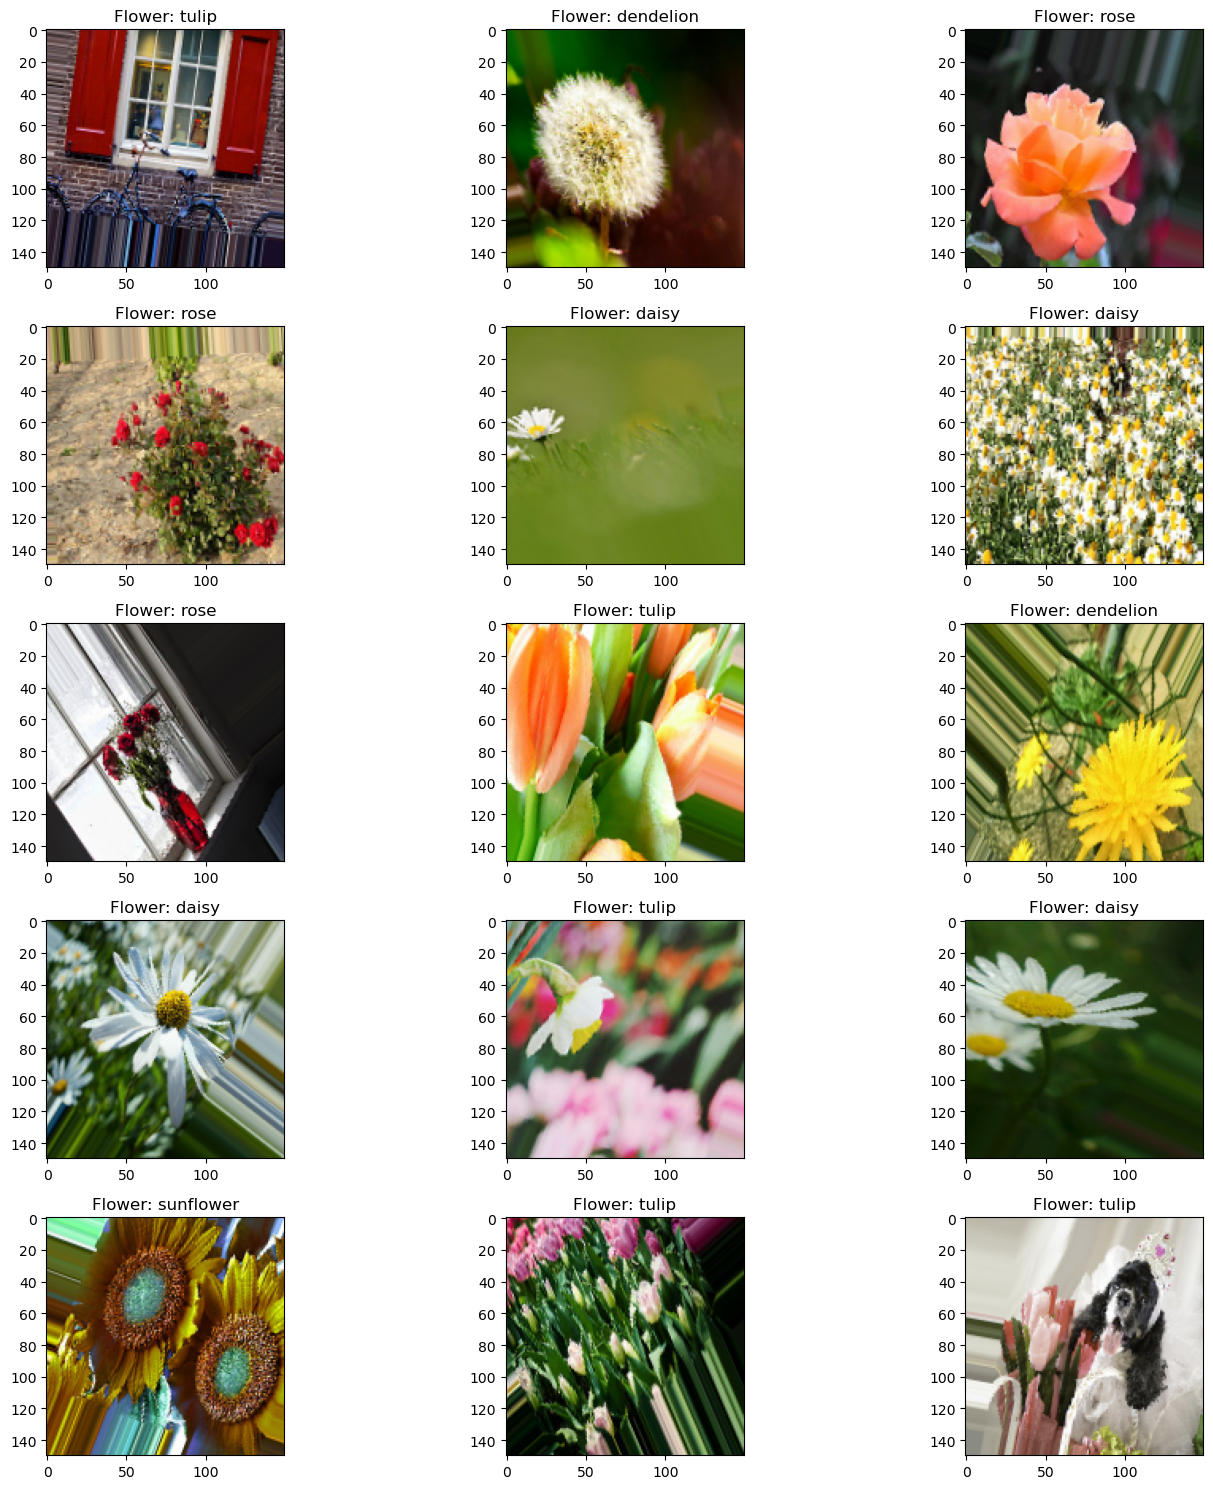

In [13]:
fig,ax=plt.subplots(5,3)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (3):
        l=rn.randint(0,len(train_labels))
        ax[i,j].imshow(traindata[l])
        ax[i,j].set_title('Flower: '+lbls[l])
        
plt.tight_layout()

**converting list into array**

In [14]:
traindata = np.array(traindata)
testdata = np.array(testdata)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [15]:
traindata.shape

(3457, 150, 150, 3)

## **Buliding Model**

In [16]:
K.clear_session()
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=96, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=96, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation='softmax'))  # Adjust the number of output units based on your classification task
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\Harsha\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 37, 37, 96)          │          55,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 96)          │          83,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 96)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7776)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,981,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,143,749 (15.81 MB)

 Trainable params: 4,143,749 (15.81 MB)

 Non-trainable params: 0 (0.00 B)

## Layers and Parameters Breakdown:

### **Convolutional Layers:**
1. **First Layer**: 
   - Applies 32 filters to the input images, creating feature maps that highlight basic patterns. 
   - **Parameters**: 2,432.

2. **Second Layer**: 
   - Builds on the first layer by applying 64 filters to detect more complex features from the initial maps. 
   - **Parameters**: 18,496.

3. **Third Layer**: 
   - Introduces 96 filters to capture finer details and more intricate patterns from the previous output.
   - **Parameters**: 55,392.

4. **Fourth Layer**: 
   - Adds another 96 filters, further refining the features detected by the model.
   - **Parameters**: 83,040.

### **Pooling Layers:**
- **Purpose**: These layers reduce the spatial dimensions of the feature maps by selecting the maximum value in each region, effectively downsampling the data.
- **Note**: Pooling layers do not have any trainable parameters.

### **Flatten Layer:**
- **Function**: Converts the 3D feature maps into a 1D vector of 7,776 values. This transformation prepares the data for the dense layers that follow.

### **Dense Layers:**
1. **First Dense Layer**: 
   - Fully connects every feature from the flatten layer to 512 neurons. This layer is crucial for learning complex patterns in the data.
   - **Parameters**: 3,981,824.

2. **Output Dense Layer**: 
   - Contains 5 neurons, each corresponding to a class in your classification task. This layer is responsible for making the final predictions.
   - **Parameters**: 2,565.

### **Overall Summary:**
- **Total Parameters**: 4,143,749.
- **Trainable Parameters**: All parameters in this model are trainable, meaning they are updated during the training process to optimize the model's performance.

In [17]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
hist = model.fit(
    train_data,
    epochs=21,
    validation_data=test_data,
    callbacks=[early_stopping]
)

Epoch 1/21


C:\Users\Harsha\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


109/109 ━━━━━━━━━━━━━━━━━━━━ 108s 937ms/step - accuracy: 0.3394 - loss: 1.4930 - val_accuracy: 0.4860 - val_loss: 1.2572
Epoch 2/21
109/109 ━━━━━━━━━━━━━━━━━━━━ 104s 928ms/step - accuracy: 0.5025 - loss: 1.1777 - val_accuracy: 0.5477 - val_loss: 1.0542
Epoch 3/21
109/109 ━━━━━━━━━━━━━━━━━━━━ 106s 946ms/step - accuracy: 0.5784 - loss: 1.0256 - val_accuracy: 0.5884 - val_loss: 1.0065
Epoch 4/21
109/109 ━━━━━━━━━━━━━━━━━━━━ 103s 924ms/step - accuracy: 0.6027 - loss: 0.9946 - val_accuracy: 0.6151 - val_loss: 0.9462
Epoch 5/21
109/109 ━━━━━━━━━━━━━━━━━━━━ 104s 931ms/step - accuracy: 0.6097 - loss: 0.9492 - val_accuracy: 0.6372 - val_loss: 0.9084
Epoch 6/21
109/109 ━━━━━━━━━━━━━━━━━━━━ 104s 928ms/step - accuracy: 0.6449 - loss: 0.9030 - val_accuracy: 0.6605 - val_loss: 0.9023
Epoch 7/21
109/109 ━━━━━━━━━━━━━━━━━━━━ 103s 920ms/step - accuracy: 0.6746 - loss: 0.8373 - val_accuracy: 0.6686 - val_loss: 0.8247
Epoch 8/21
109/109 ━━━━━━━━━━━━━━━━━━━━ 104s 935ms/step - accuracy: 0.6808 - loss: 0.83

In [19]:
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

27/27 ━━━━━━━━━━━━━━━━━━━━ 13s 471ms/step - accuracy: 0.7222 - loss: 0.7440
Test Loss: 0.7345401644706726
Test Accuracy: 0.724418580532074


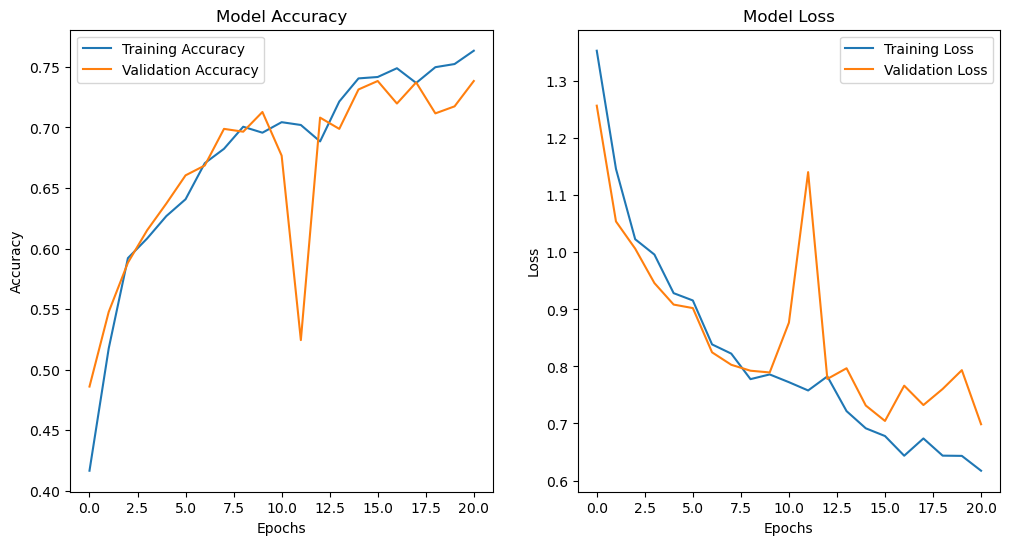

In [20]:
history = hist.history
# Plot accuracy and loss
plt.figure(figsize=(12, 6))
# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
